## Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

#### Content:
    
    This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

    The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

    Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

    The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

#### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


#### Inspiration /Label 

Your task is to make a model that can consider the data provided and predict the Average Price.

In [170]:
# Data Wrangling and analytics libraries
import pandas as pd
import numpy as np

# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sn

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# to remove outliers
from scipy.stats import zscore

#for label encoding of categorical features
from sklearn.preprocessing import LabelEncoder

# PCA
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split

#stanrdization
from sklearn.preprocessing import StandardScaler

# Linear regression
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

### Loading the Dataset

In [2]:
data1=pd.read_csv('avacado.csv')
data1.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


### Dropping the 'Unnamed: 0' index column from csv file

In [ ]:
data1.drop('Unnamed: 0',axis=1,inplace=True)
data1.head()

### Checking the dimensionality

In [5]:
data1.shape

(16468, 13)

### Checking for duplicates

In [6]:
data1_dup=data1[data1.duplicated()]

In [7]:
data1_dup

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1520,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for Null values

In [8]:
data1.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [9]:
print("%ge of Null values in the dataset = ",(14951/16468)*100)

%ge of Null values in the dataset =  90.78819528783094


#### These many % ge of Null values in each column means these are accidental and we can remove these null values.

In [10]:
data2=data1.dropna()
data2=data2.reset_index(drop=True)

In [11]:
data2.shape

(1517, 13)

### For further processes, we will use 'data2' dataframe.

### Dataset Description

In [12]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 154.2+ KB


In [13]:
data2.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


##### Observation:

    The total number of rows of data are same for all features.
    
    Our dataset has 10 features with float64 datatype and 3 features with object datatype.
    
    The values of standard deviation for 'Total Volume','Total Bags','Small Bags','XLarge Bags' features is greater than 3, which means the data in these feature columns is spread away from the mean.

In [20]:
data2.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### Univariate analysis of each feature

In [21]:
list_cols=data2.columns

In [22]:
list_cols[0]

'Date'

#### 1. 'Date' - The date of the observation

In [23]:
data2['Date'].value_counts()

05-04-2015    34
12-04-2015    34
19-04-2015    33
26-04-2015    32
29-03-2015    32
              ..
03-07-2016     3
26-06-2016     3
04-09-2016     3
31-07-2016     3
11-09-2016     2
Name: Date, Length: 104, dtype: int64

##### Observation:
    
    We see that many of the observations of avacado prices are recorded multiple times for a single day, which may be related to different regions.
    
    In data preprocessing steps, we will extract seperate features like year and month.

In [24]:
list_cols[1]

'AveragePrice'

#### 2. 'AveragePrice' - The average price of a single avocado

This is our target feature.

In [25]:
data2['AveragePrice'].value_counts()

1.08    46
0.99    44
1.03    44
1.09    43
1.10    43
        ..
1.61     1
1.66     1
1.60     1
0.64     1
1.64     1
Name: AveragePrice, Length: 113, dtype: int64

In [34]:
data2['AveragePrice'].describe()

count    1517.000000
mean        1.074990
std         0.188891
min         0.490000
25%         0.980000
50%         1.080000
75%         1.190000
max         1.680000
Name: AveragePrice, dtype: float64

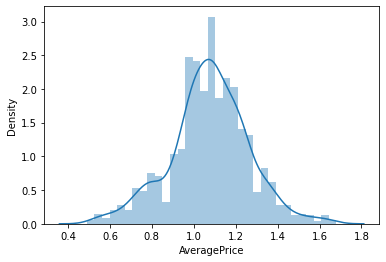

In [29]:
sn.distplot(data2['AveragePrice'])
plt.show()

##### Observation:

    The distribution of data in 'Average Price' is bell shaped normal curve.

In [32]:
list_cols[2]

'Total Volume'

#### 3. 'Total Volume' - total number of avacado sold for that particular day

In [33]:
data2['Total Volume'].value_counts()

453631.25     1
198395.76     1
63902.90      1
592588.01     1
63608.01      1
             ..
83453.76      1
202831.97     1
1352027.64    1
435210.71     1
212091.14     1
Name: Total Volume, Length: 1517, dtype: int64

In [36]:
data2['Total Volume'].describe()

count    1.517000e+03
mean     1.601879e+06
std      4.433143e+06
min      3.875074e+04
25%      1.474700e+05
50%      4.027919e+05
75%      9.819751e+05
max      4.465546e+07
Name: Total Volume, dtype: float64

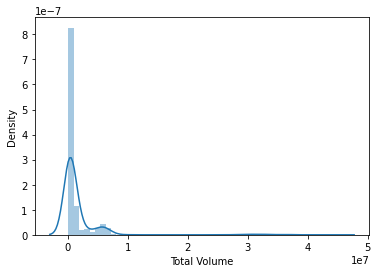

In [35]:
sn.distplot(data2['Total Volume'])
plt.show()

##### Observation:

    The data distribution of 'Total Volume' feature is not normal bell shaped curve. The mean value is greater than median value, confirming the right skewness.

In [37]:
list_cols[3]

'4046'

#### 4. '4046' - Total number of avocados with PLU 4046 sold

In [38]:
data2['4046'].value_counts()

2105670.46    1
13652.41      1
325884.06     1
842.40        1
1355.20       1
             ..
57557.75      1
3108.09       1
41244.44      1
1575318.71    1
1132.00       1
Name: 4046, Length: 1517, dtype: int64

In [39]:
data2['4046'].describe()

count    1.517000e+03
mean     6.464387e+05
std      1.947614e+06
min      4.677200e+02
25%      2.040034e+04
50%      8.175117e+04
75%      3.775785e+05
max      1.893304e+07
Name: 4046, dtype: float64

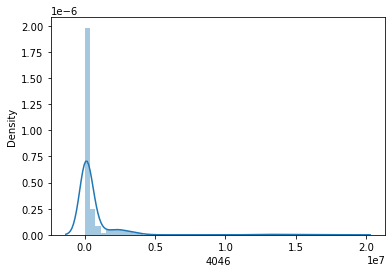

In [40]:
sn.distplot(data2['4046'])
plt.show()

##### Observation:

    The 'PLU 4046' volumes sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [41]:
list_cols[4]

'4225'

#### 5. '4225' - Total number of avocados with PLU 4225 sold

In [42]:
data2['4225'].value_counts()

20278.37      1
69081.33      1
78055.21      1
8599.82       1
33868.95      1
             ..
1723310.79    1
317090.39     1
54378.07      1
1982.25       1
376914.26     1
Name: 4225, Length: 1517, dtype: int64

In [43]:
data2['4225'].describe()

count    1.517000e+03
mean     6.114375e+05
std      1.672906e+06
min      1.783770e+03
25%      4.147606e+04
50%      1.186649e+05
75%      4.851503e+05
max      1.895648e+07
Name: 4225, dtype: float64

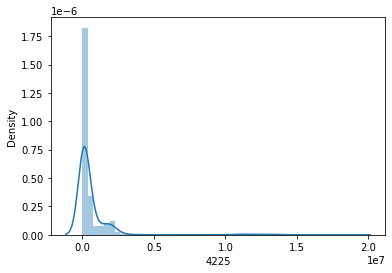

In [44]:
sn.distplot(data2['4225'])
plt.show()

##### Observation:

    The 'PLU 4225' volumes sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [45]:
list_cols[5]

'4770'

#### 6. '4770' - Total number of avocados with PLU 4770 sold

In [46]:
data2['4770'].value_counts()

57.68        2
106106.86    1
47.15        1
27944.07     1
1613.63      1
            ..
1003.63      1
50.55        1
58.70        1
4107.26      1
130.50       1
Name: 4770, Length: 1516, dtype: int64

In [47]:
data2['4770'].describe()

count    1.517000e+03
mean     5.040550e+04
std      1.377812e+05
min      0.000000e+00
25%      9.112500e+02
50%      7.688170e+03
75%      2.916730e+04
max      1.381516e+06
Name: 4770, dtype: float64

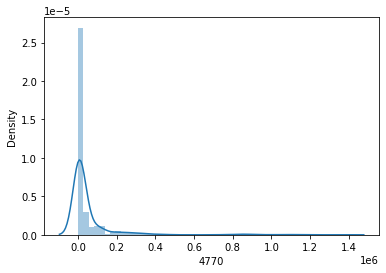

In [48]:
sn.distplot(data2['4770'])
plt.show()

##### Observation:

    The 'PLU 4770' volumes sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [49]:
list_cols[6]

'Total Bags'

#### 7.'Total Bags' - total bags of avacado sold

In [50]:
data2['Total Bags'].value_counts()

929791.25     1
65342.19      1
80673.23      1
1226467.77    1
189301.37     1
             ..
59472.47      1
14362.08      1
16321.19      1
51669.25      1
21611.56      1
Name: Total Bags, Length: 1517, dtype: int64

In [52]:
data2['Total Bags'].describe()

count    1.517000e+03
mean     2.935974e+05
std      7.579765e+05
min      3.311770e+03
25%      3.620689e+04
50%      7.397906e+04
75%      1.576097e+05
max      6.736304e+06
Name: Total Bags, dtype: float64

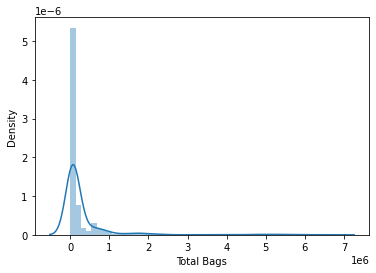

In [51]:
sn.distplot(data2['Total Bags'])
plt.show()

##### Observation:

    The 'Total Bags' sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [53]:
list_cols[7]

'Small Bags'

#### 8.'Small Bags' - small bags of avacado sold

In [54]:
data2['Small Bags'].value_counts()

15997.43     1
48304.30     1
8876.65      1
9586.80      1
27736.40     1
            ..
7946.78      1
9533.88      1
181854.71    1
34448.65     1
235274.47    1
Name: Small Bags, Length: 1517, dtype: int64

In [55]:
data2['Small Bags'].describe()

count    1.517000e+03
mean     2.487736e+05
std      6.474765e+05
min      3.311770e+03
25%      2.972722e+04
50%      6.237569e+04
75%      1.461994e+05
max      5.893642e+06
Name: Small Bags, dtype: float64

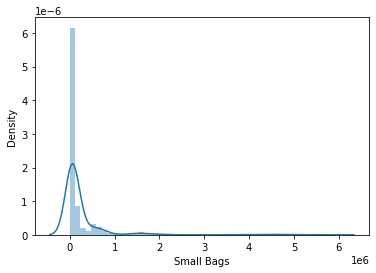

In [56]:
sn.distplot(data2['Small Bags'])
plt.show()

##### Observation:

    The 'Small Bags' sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [57]:
list_cols[8]

'Large Bags'

#### 9.'Large Bags' -Large bags of avacado sold

In [58]:
data2['Large Bags'].value_counts()

0.00       134
48.89        3
8.89         3
31.11        2
51.11        2
          ... 
562.37       1
1837.60      1
1994.62      1
319.56       1
93.25        1
Name: Large Bags, Length: 1377, dtype: int64

In [59]:
data2['Large Bags'].describe()

count    1.517000e+03
mean     4.264205e+04
std      1.182157e+05
min      0.000000e+00
25%      5.407400e+02
50%      5.044350e+03
75%      2.926767e+04
max      1.121076e+06
Name: Large Bags, dtype: float64

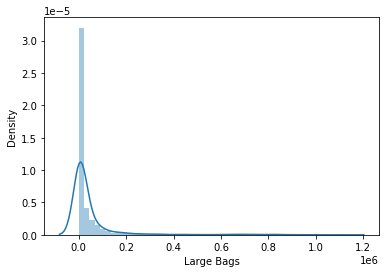

In [60]:
sn.distplot(data2['Large Bags'])
plt.show()

##### Observation:

    The 'Large Bags' sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [61]:
list_cols[9]

'XLarge Bags'

#### 10.'XLarge Bags' - extra large bags of avacado sold

In [62]:
data2['XLarge Bags'].value_counts()

0.00       798
15.88        2
37.50        2
240.28       2
11.27        2
          ... 
4464.22      1
778.00       1
3397.00      1
52.33        1
35.92        1
Name: XLarge Bags, Length: 711, dtype: int64

In [63]:
data2['XLarge Bags'].describe()

count      1517.000000
mean       2181.771074
std        7455.712144
min           0.000000
25%           0.000000
50%           0.000000
75%         401.480000
max      108072.790000
Name: XLarge Bags, dtype: float64

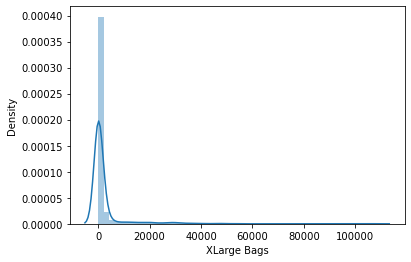

In [64]:
sn.distplot(data2['XLarge Bags'])
plt.show()

##### Observation:

    The 'XLarge Bags' sold data is not normally distributed, the mean is greater than median thus confirming the right skewness present.

In [65]:
list_cols[10]

'type'

#### 11. 'type' - conventional or organic

In [66]:
data2['type'].value_counts()

conventional    1517
Name: type, dtype: int64

##### Observation:

    Our dataset has info of only conventional type of fruit.

In [67]:
list_cols[11]

'year'

#### 12.'year' - the year

In [68]:
data2['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

##### Observation:

    The dataset has recorded the avacado prices for the years 2015 and 2016.

In [69]:
list_cols[12]

'region'

#### 13. 'region' - the city or region of the observation

In [70]:
data2['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

### Observations after univariate analysis:

    Continuous features - AveragePrice, TotalVolume, 4046 , 4225 , 4770, TotalBags , SmallBags , LargeBags , XLargeBags.

    Discrete features - year

    Categorical features - type, region.
    
#### Right skewness presence in below features-
        
        TotalVolume,4046,4225,4770,TotalBags,SmallBags,LargeBags,XLargeBags

### Multi-variate analysis

#### check correlation with target feature

In [77]:
dt_corr=data2.corr()
dt_corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000


In [78]:
dt_corr['AveragePrice']

AveragePrice    1.000000
Total Volume   -0.140470
4046           -0.190096
4225           -0.092084
4770           -0.100567
Total Bags     -0.111597
Small Bags     -0.097682
Large Bags     -0.177480
XLarge Bags    -0.048284
year            0.178683
Name: AveragePrice, dtype: float64

##### Observation:

    All numerical features are having negative correlation with 'Average Prices of avacado'. 
    
    This is in accordance with the rule that as demand increases, prices drop.

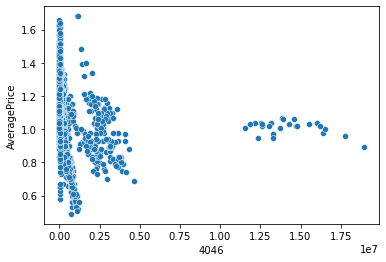

In [79]:
sn.scatterplot(data2['4046'],data2['AveragePrice'])
plt.show()

##### Observation:

    The average prices of avacado are high at first as the 4046 variant are selling in small quantity. 
    
    As the sell of 4046 variant increases, the average prices come down rapidly and as the sell of 4046 increases further, the average prices become saturated.

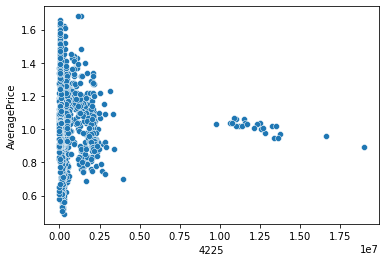

In [80]:
sn.scatterplot(data2['4225'],data2['AveragePrice'])
plt.show()

##### Observation:

    The average price of avacado was high at the start of distribution of PLU 4225, but as the sale started increasing slowly slowly the average price started coming down and at later stages of sale increase the price became saturated.
    
    The price decrease happens in a more slow and steady fashion as compared to PLU 4046.

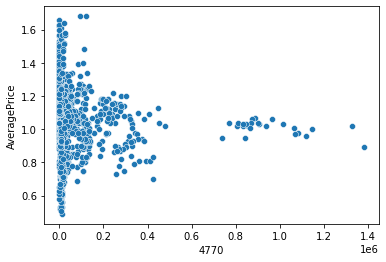

In [81]:
sn.scatterplot(data2['4770'],data2['AveragePrice'])
plt.show()

##### Observation:

    The average price of avacado was high at the start of distribution of PLU 4225, but as the sale started increasing slowly slowly the average price started coming down and at later stages of sale increase the price became saturated.
    
    The price decrease is most steady for PLU 4770 as compared to other two product units.

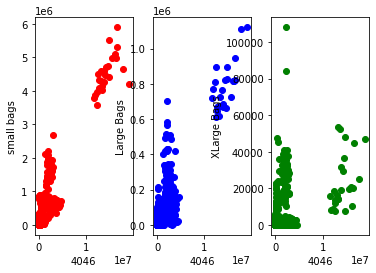

In [108]:

fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.scatter(data2['4046'],data2['Small Bags'],c='red')
ax1.set(ylabel='small bags',xlabel='4046')
ax2.scatter(data2['4046'],data2['Large Bags'],c='blue')
ax2.set(ylabel='Large Bags',xlabel='4046')
ax3.scatter(data2['4046'],data2['XLarge Bags'],c='green')
ax3.set(ylabel='XLarge Bags',xlabel='4046')

plt.show()

##### Observation:

    As the sale of PLU 4046 increased,we see the sale of XLarge Bags gradually saturated while sale of small bags and large bags show linear relation with 4046 .

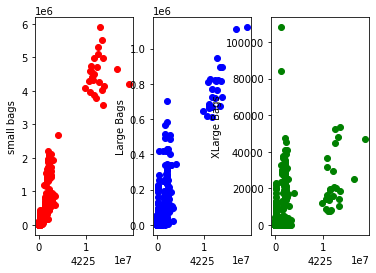

In [109]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.scatter(data2['4225'],data2['Small Bags'],c='red')
ax1.set(ylabel='small bags',xlabel='4225')
ax2.scatter(data2['4225'],data2['Large Bags'],c='blue')
ax2.set(ylabel='Large Bags',xlabel='4225')
ax3.scatter(data2['4225'],data2['XLarge Bags'],c='green')
ax3.set(ylabel='XLarge Bags',xlabel='4225')

plt.show()

##### Observation:

    As the sale of PLU 4225 increased,we see the sale of XLarge Bags gradually saturated while sale of small bags and large bags show linear relation with 4225 .

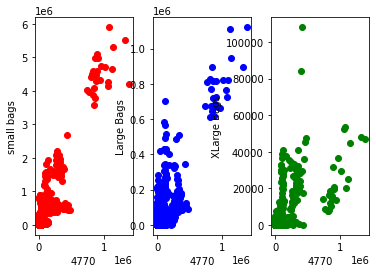

In [110]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3)

ax1.scatter(data2['4770'],data2['Small Bags'],c='red')
ax1.set(ylabel='small bags',xlabel='4770')
ax2.scatter(data2['4770'],data2['Large Bags'],c='blue')
ax2.set(ylabel='Large Bags',xlabel='4770')
ax3.scatter(data2['4770'],data2['XLarge Bags'],c='green')
ax3.set(ylabel='XLarge Bags',xlabel='4770')

plt.show()

##### Observation:

    As the sale of PLU 4770 increased,we see the sale of XLarge Bags gradually saturated while sale of small bags and large bags show linear relation with 4770 .

### Data Preprocessing

#### Label Encoding of categorical columns

In [132]:
data2.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [134]:
le=LabelEncoder()

In [136]:
data2['region'].head()

0    Albany
1    Albany
2    Albany
3    Albany
4    Albany
Name: region, dtype: object

In [137]:
data2['region']=le.fit_transform(data2['region'])

In [138]:
data2['region'].head()

0    0
1    0
2    0
3    0
4    0
Name: region, dtype: int32

##### Observations:

    As the features from 'Date' column are already extracted in the 'year' column, we can safely drop 'Date' column.
    
    Also, we have only 1 type of avacado data, so we can drop 'type' feature.

In [140]:
data2.shape

(1517, 13)

In [141]:
data2.drop('Date',axis=1,inplace=True)
data2.drop('type',axis=1,inplace=True)

In [142]:
data2.shape

(1517, 11)

#### checking for outliers

We will check for outliers in our continuous features data.

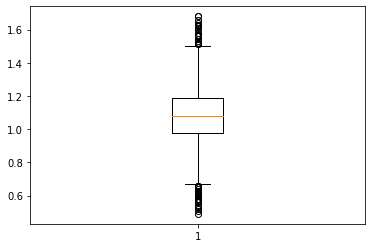

In [114]:
plt.boxplot(data2['AveragePrice'])
plt.show()

In [115]:
data2['AveragePrice'].quantile([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

0.1    0.82
0.2    0.94
0.3    0.99
0.4    1.04
0.5    1.08
0.6    1.12
0.7    1.17
0.8    1.22
0.9    1.30
1.0    1.68
Name: AveragePrice, dtype: float64

##### Observation: No outliers for 'AveragePrice' feature

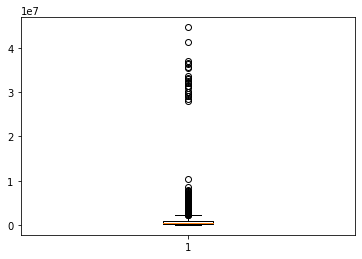

In [117]:
plt.boxplot(data2['Total Volume'])
plt.show()

##### Observation: Outliers are present in 'Total Volume' dataset.

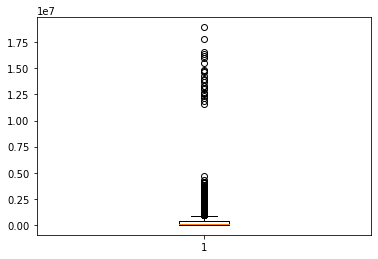

In [121]:
plt.boxplot(data2['4046'])
plt.show()

##### Observation: Outliers are present in '4046' feature.

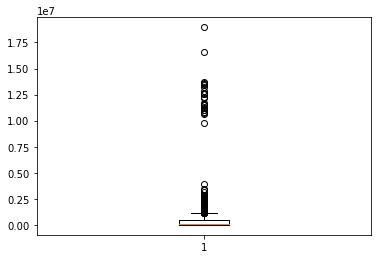

In [122]:
plt.boxplot(data2['4225'])
plt.show()

##### Observation: Outliers are present in '4225' features.

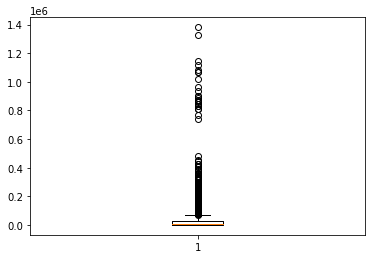

In [123]:
plt.boxplot(data2['4770'])
plt.show()

##### Observation: Outliers are present in '4770' feature.

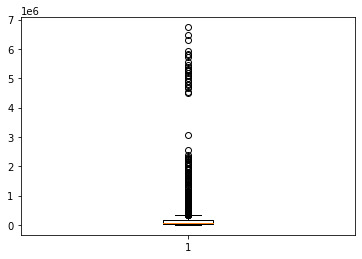

In [124]:
plt.boxplot(data2['Total Bags'])
plt.show()

##### Observation: Outliers are present in 'Total bags' feature.

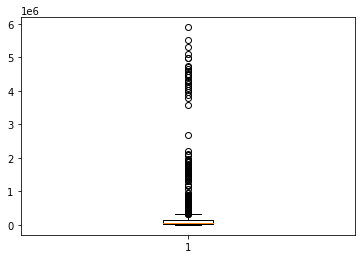

In [125]:
plt.boxplot(data2['Small Bags'])
plt.show()

##### Observation: Outliers are present in 'Small bags' feature.

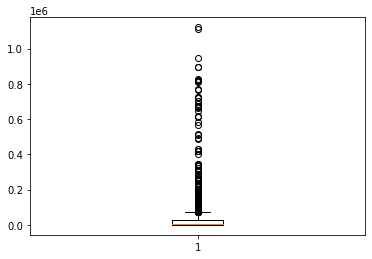

In [126]:
plt.boxplot(data2['Large Bags'])
plt.show()

##### Observation: Outliers are present in 'Large bags' feature.

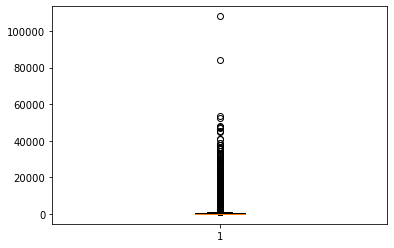

In [127]:
plt.boxplot(data2['XLarge Bags'])
plt.show()

##### Observation: Outliers are present in 'XLarge bags' feature.

### Outlier Removal

In [144]:
#temporary store dataset into a temp dataframe
data3=pd.DataFrame(data=data2)
data3.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0


#### We will use 'data3' dataframe for outlier removal and if the %ge of data loss is small , then only we will go ahead with outlier removal.

In [146]:
data3.shape

(1517, 11)

In [147]:
z=np.abs(zscore(data3))
data3_new=data3[(z<3).all(axis=1)]

In [148]:
data3_new.shape

(1436, 11)

In [149]:
print("%ge loss of data = ",((1517-1436)/1517)*100)

%ge loss of data =  5.339485827290705


### After outlier removal, the data loss is 5% approx. So we will proceed with 'data3_new' dataset.

#### Splitting the dataset into independent features and target feature.

In [150]:
x=data3_new.drop('AveragePrice',axis=1)
y=data3_new['AveragePrice']

In [151]:
x.shape

(1436, 10)

#### finding the best random state for train_test_split

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
s=StandardScaler()

maxAccu=0
maxRS=0

x1=x
y1=y

for i in range(1,500):
    x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=.33,random_state=i)
    x_train1=s.fit_transform(x_train1)
    x_test1=s.transform(x_test1)
    LR = LinearRegression()
    LR.fit(x_train1,y_train1)
    predrf=LR.predict(x_test1)
    acc=LR.score(x_train1,y_train1)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print("Our model is learning best at accuracy of ",maxAccu," at random state ",maxRs)

Our model is learning best at accuracy of  0.2560994227064267  at random state  116


#### split the dataset into training and testing 

In [156]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=116)

#### Standardizing

In [158]:
s=StandardScaler()

x_train=s.fit_transform(x_train)

x_test=s.transform(x_test)

### Modelling

### Linear Regression

In [160]:
lr=LinearRegression()
lr.fit(x_train,y_train)

lr.score(x_train,y_train)

0.2560994227064267

##### Observation: Our model is learning with 25 % accuracy.

In [161]:
lr.intercept_

1.0806483687778672

In [162]:
lr.coef_

array([-1.52624581e+12,  7.62437600e+11,  5.87300162e+11,  6.11703689e+10,
        4.75592188e+12, -3.85100556e+12, -7.79474497e+11, -4.73885348e+10,
        3.15399170e-02, -1.28173828e-02])

In [163]:
pred_lr=lr.predict(x_test)

In [164]:
print("Errors:\n")
print("Mean Squared Error: \t",mean_squared_error(y_test,pred_lr))
print("\nMean Absolute Error: \t",mean_absolute_error(y_test,pred_lr))
print("\nRoot Mean Squared Error: \t",np.sqrt(mean_squared_error(y_test,pred_lr)))

Errors:

Mean Squared Error: 	 0.029873664566041493

Mean Absolute Error: 	 0.131255027049549

Root Mean Squared Error: 	 0.17283999700891425


In [165]:
print("The R2 score is ",r2_score(y_test,pred_lr))

The R2 score is  0.11117421713020692


##### cross validation score 

In [166]:
# cross validation
from sklearn.model_selection import cross_val_score

score_cv = cross_val_score(lr, x_train, y_train, cv=10)
print(score_cv)

print('\n The absolute mean score we got from 10-Fold CV:',np.mean(score_cv))

[0.21641217 0.24678257 0.31610541 0.20303564 0.1872362  0.16856841
 0.29844624 0.216489   0.09716933 0.37828044]

 The absolute mean score we got from 10-Fold CV: 0.23285254256428725


### Decision Tree Regressor

In [169]:
dtr=DecisionTreeRegressor()

dtr_cv=cross_val_score(dtr,x_train,y_train,cv=10)

print('\n For Decision Tree Regressor,the absolute mean score we got from 10-Fold CV:',np.mean(dtr_cv))


 For Decision Tree Regressor,the absolute mean score we got from 10-Fold CV: 0.6279156132169427


### Random Forest Regressor

In [176]:
rfr_cross_val=[]
rfr_n_estimators=[]

for i in range(10,50):
    rfr=RandomForestRegressor(n_estimators=i)
    rfr_n_estimators.append(i)
    rfr_cross_val.append(cross_val_score(rfr,x_train,y_train,cv=10).mean())
    
rf_cv=pd.DataFrame({})
rf_cv["RF CV Score"]=rfr_cross_val
rf_cv['n estimator']=rfr_n_estimators

rf_cv.max()

RF CV Score     0.797141
n estimator    49.000000
dtype: float64

In [172]:
results1=[]
results1.append(score_cv)
results1.append(dtr_cv)
results1.append(rf_cv['RF CV Score'])

names1=[]
names1.append("Linear Regression")
names1.append("Decision Tree Regressor")
names1.append("Random Forest Regressor")

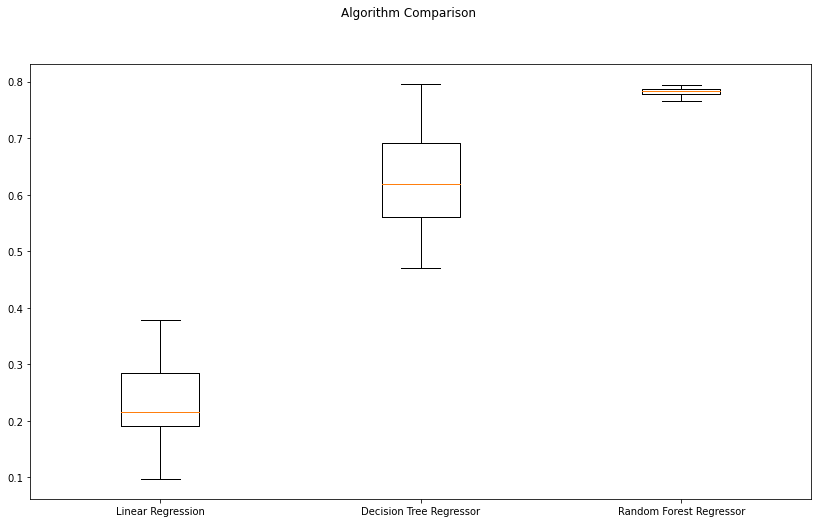

In [173]:
fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(111)
fig.suptitle('Algorithm Comparison')
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

### So, the best model would be Random Forest Regressor

### Hyper parameter Tuning

We have already looped random forest regressor for best n_estimator = 49.

### Saving the model

In [177]:
fin_mod=RandomForestRegressor(n_estimators=49)

In [178]:
import joblib
joblib.dump(fin_mod,'avacado_price.pkl')

['avacado_price.pkl']